In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
sj = pd.read_excel('SanJuan_all.xlsx', index_col = 'Unnamed: 0')
iq = pd.read_excel('Iquitos_all.xlsx', index_col = 'Unnamed: 0')

In [3]:
sj.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0
1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0
1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0
1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0
1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0


In [4]:
# Change temperature unit from to celsius
def temp_change(temp_data):
    data = temp_data.copy()
    for col in data.columns:
        if 'temp_k' in col:
            data[col] = data[col].apply(lambda x: x - 273)
            col = col.replace('temp_k', 'temp_c')
    return data

In [5]:
sj = temp_change(sj)
iq = temp_change(iq)

In [6]:
sj.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,24.572857,24.742857,19.414286,26.8,22.9,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0
1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,25.211429,25.442857,20.951429,27.9,23.4,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0
1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,25.781429,25.878571,22.434286,27.5,24.3,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0
1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,25.987143,26.228571,22.310000,28.4,24.0,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0
1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,26.518571,26.664286,22.821429,28.9,24.5,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0


In [7]:
def time_series_plot(series):
    series.fillna(0)
    plt.plot(series)
    return

In [8]:
sj.columns

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [9]:
# Correlation between the Precipitations columns
sj_precip = sj[[col for col in sj.columns if 'precip' in col]]
iq_precip = iq[[col for col in iq.columns if 'precip' in col]]

In [10]:
sj_precip.corr()

,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_sat_precip_amt_mm,station_precip_mm
precipitation_amt_mm,1.000000,0.502525,1.000000,0.530664
reanalysis_precip_amt_kg_per_m2,0.502525,1.000000,0.502525,0.466325
reanalysis_sat_precip_amt_mm,1.000000,0.502525,1.000000,0.530664
station_precip_mm,0.530664,0.466325,0.530664,1.000000


In [11]:
iq_precip.corr()

,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_sat_precip_amt_mm,station_precip_mm
precipitation_amt_mm,1.000000,0.313484,1.000000,0.375729
reanalysis_precip_amt_kg_per_m2,0.313484,1.000000,0.313484,0.121490
reanalysis_sat_precip_amt_mm,1.000000,0.313484,1.000000,0.375729
station_precip_mm,0.375729,0.121490,0.375729,1.000000


In [12]:
# Diurnal correlations
print(sj[['reanalysis_tdtr_k', 'station_diur_temp_rng_c']].corr())
print(iq[['reanalysis_tdtr_k', 'station_diur_temp_rng_c']].corr())

                         reanalysis_tdtr_k  station_diur_temp_rng_c
reanalysis_tdtr_k                  1.00000                  0.36212
station_diur_temp_rng_c            0.36212                  1.00000
                         reanalysis_tdtr_k  station_diur_temp_rng_c
reanalysis_tdtr_k                 1.000000                 0.596003
station_diur_temp_rng_c           0.596003                 1.000000


In [13]:
sj_airtemp = sj[['reanalysis_air_temp_k', 'reanalysis_avg_temp_k']]
sj_airtemp.corr()
# Should use only one of these two

,reanalysis_air_temp_k,reanalysis_avg_temp_k
reanalysis_air_temp_k,1.000000,0.997532
reanalysis_avg_temp_k,0.997532,1.000000


In [14]:
def filter_data(data, word):
    temp = data[[col for col in data.columns if word in col]]
    return temp

In [15]:
# Max temp, compare difference between Celsius and Kelvin
sj_maxtemp = filter_data(sj, 'max')
iq_maxtemp = filter_data(iq, 'max')

In [16]:
sj_maxtemp.corr()

,reanalysis_max_air_temp_k,station_max_temp_c
reanalysis_max_air_temp_k,1.000000,0.774801
station_max_temp_c,0.774801,1.000000


In [17]:
sj_maxtemp['reanalysis_max_air_temp_k'] = sj_maxtemp['reanalysis_max_air_temp_k'] - 273
sj_maxtemp.head()

/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,reanalysis_max_air_temp_k,station_max_temp_c
1990-04-30,-246.2,29.4
1990-05-07,-245.1,31.7
1990-05-14,-245.5,32.2
1990-05-21,-244.6,33.3
1990-05-28,-244.1,35.0


In [18]:
sj_maxtemp.corr()
# It does not matter if I do not subtract 273.

,reanalysis_max_air_temp_k,station_max_temp_c
reanalysis_max_air_temp_k,1.000000,0.774801
station_max_temp_c,0.774801,1.000000


In [19]:
# Descriptive Stats
sj_train = sj[~sj.total_cases.isnull()]
iq_train = iq[~iq.total_cases.isnull()]

In [20]:
desc_sj = pd.DataFrame(index = sj.columns)
desc_sj['Mean'] = sj.apply(lambda x: np.mean(x), axis = 0)
desc_sj['Max'] = sj.apply(lambda x: np.max(x), axis = 0)
desc_sj['Min'] = sj.apply(lambda x: np.min(x), axis = 0)
desc_sj['Standard Deviation'] = sj.apply(lambda x: np.std(x), axis = 0)
desc_sj = desc_sj.iloc[:desc_sj.shape[0] - 1]

In [21]:
desc_sj

,Mean,Max,Min,Standard Deviation
ndvi_ne,0.050453,0.500400,-0.463400,0.114408
ndvi_nw,0.060731,0.649000,-0.456100,0.092118
ndvi_se,0.177523,0.393129,-0.015533,0.059385
ndvi_sw,0.163152,0.381420,-0.063457,0.056068
precipitation_amt_mm,33.522270,390.600000,0.000000,42.256236
reanalysis_air_temp_k,26.227588,29.200000,22.938571,1.251354
reanalysis_avg_temp_k,26.334698,29.164286,23.114286,1.233577
reanalysis_dew_point_temp_k,22.155665,24.795714,16.642857,1.591813
reanalysis_max_air_temp_k,28.441751,31.300000,24.800000,1.272517
reanalysis_min_air_temp_k,24.360690,26.900000,19.600000,1.312942


In [22]:
desc_iq = pd.DataFrame(index = iq.columns)
desc_iq['Mean'] = iq.apply(lambda x: np.mean(x), axis = 0)
desc_iq['Max'] = iq.apply(lambda x: np.max(x), axis = 0)
desc_iq['Min'] = iq.apply(lambda x: np.min(x), axis = 0)
desc_iq['Standard Deviation'] = iq.apply(lambda x: np.std(x), axis = 0)
desc_iq = desc_iq.iloc[:desc_iq.shape[0] - 1]

In [23]:
desc_iq

,Mean,Max,Min,Standard Deviation
ndvi_ne,0.264569,0.508357,0.061729,0.079767
ndvi_nw,0.246152,0.464800,0.035860,0.078215
ndvi_se,0.252087,0.538314,0.029880,0.075985
ndvi_sw,0.270362,0.546017,0.064183,0.085999
precipitation_amt_mm,62.778333,210.830000,0.000000,34.531356
reanalysis_air_temp_k,24.844165,28.935714,21.554286,1.155135
reanalysis_avg_temp_k,26.111214,30.328571,21.892857,1.325691
reanalysis_dew_point_temp_k,22.513157,25.450000,17.088571,1.377723
reanalysis_max_air_temp_k,34.057887,41.100000,27.000000,2.328325
reanalysis_min_air_temp_k,19.832143,23.000000,13.200000,1.640442


In [24]:
# Missing Value
sj_y = sj.pop('total_cases')
iq_y = iq.pop('total_cases')

In [25]:
sj_na = pd.DataFrame([sj[col].isnull().sum() for col in sj.columns], 
             columns = ['Number of Missing'], index=sj.columns)
iq_na = pd.DataFrame([iq[col].isnull().sum() for col in iq.columns],
                    columns = ['Number of Missing'], index=iq.columns)

In [26]:
iq_na

,Number of Missing
ndvi_ne,3
ndvi_nw,3
ndvi_se,3
ndvi_sw,3
precipitation_amt_mm,4
reanalysis_air_temp_k,4
reanalysis_avg_temp_k,4
reanalysis_dew_point_temp_k,4
reanalysis_max_air_temp_k,4
reanalysis_min_air_temp_k,4


In [27]:
sj_na

,Number of Missing
ndvi_ne,234
ndvi_nw,60
ndvi_se,20
ndvi_sw,20
precipitation_amt_mm,11
reanalysis_air_temp_k,8
reanalysis_avg_temp_k,8
reanalysis_dew_point_temp_k,8
reanalysis_max_air_temp_k,8
reanalysis_min_air_temp_k,8


In [28]:
# Try replacing NAs
sj_xx = sj.fillna(0)
iq_xx = iq.fillna(0)

In [29]:
temp = pd.DataFrame(sj.station_avg_temp_c.groupby([sj.index.year, sj.index.month]).mean())

In [30]:
# 2013 for SJ
def weekplot(data, variable, years = [2000,2003,2007,2010,2012]):
    temp = pd.DataFrame(data[variable].groupby([data.index.year, data.index.weekofyear]).mean())
    #print(temp.head())
    for year in years:
        temp_year = pd.DataFrame([temp.iloc[i] for i in range(temp.shape[0])
                                 if temp.index[i][0] == year])
        temp_list = list(range(1, len(temp_year) + 1))
        plt.plot(temp_list, temp_year.values, label = year)
    plt.legend(loc = 'best')
    return

Text(0.5, 1.0, 'Average Temperature from the Weather Station in San Juan by week of year')

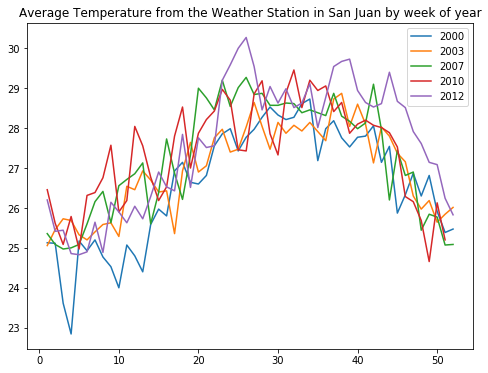

In [31]:
plt.figure(figsize = (8,6))
weekplot(sj, 'station_avg_temp_c')
plt.title('Average Temperature from the Weather Station in San Juan by week of year')

In [32]:
# The Correlations of the other variables with total_cases in San Juan
sj['total_cases'] = sj_y
sj_corr = sj.corr()['total_cases'].sort_values(ascending = False)
sj_corr

total_cases                              1.000000
reanalysis_specific_humidity_g_per_kg    0.207947
reanalysis_dew_point_temp_k              0.203774
station_avg_temp_c                       0.196617
reanalysis_max_air_temp_k                0.194532
station_max_temp_c                       0.189901
reanalysis_min_air_temp_k                0.187943
reanalysis_air_temp_k                    0.181917
station_min_temp_c                       0.177012
reanalysis_avg_temp_k                    0.175267
reanalysis_relative_humidity_percent     0.144045
reanalysis_precip_amt_kg_per_m2          0.107457
ndvi_nw                                  0.075307
reanalysis_sat_precip_amt_mm             0.060211
precipitation_amt_mm                     0.060211
station_precip_mm                        0.051759
ndvi_ne                                  0.037639
station_diur_temp_rng_c                  0.034630
ndvi_se                                  0.001113
ndvi_sw                                 -0.000333


Factors with highest correlation to total_cases
1. Specific Humidity from Reanalysis, 0.208
2. Dew Point Temperature from Reanalysis, 0.204
3. Average Temperature from the Weather Station, 0.197
4. Maximum Air Temperature from Reanalysis, 0.195
5. Maximum Temperature from the Weather Station, 0.190

In [33]:
# The Correlations of the other variables with total_cases in Iquitos
iq['total_cases'] = iq_y
iq_corr = iq.corr()['total_cases'].sort_values(ascending = False)
iq_corr

total_cases                              1.000000
reanalysis_specific_humidity_g_per_kg    0.236476
reanalysis_dew_point_temp_k              0.230401
reanalysis_min_air_temp_k                0.214514
station_min_temp_c                       0.211702
reanalysis_relative_humidity_percent     0.130083
station_avg_temp_c                       0.113070
reanalysis_precip_amt_kg_per_m2          0.101171
reanalysis_air_temp_k                    0.097098
reanalysis_sat_precip_amt_mm             0.090171
precipitation_amt_mm                     0.090171
reanalysis_avg_temp_k                    0.079872
station_max_temp_c                       0.075279
station_precip_mm                        0.042976
ndvi_sw                                  0.032999
ndvi_ne                                  0.020215
ndvi_nw                                 -0.009586
ndvi_se                                 -0.041067
reanalysis_max_air_temp_k               -0.056474
station_diur_temp_rng_c                 -0.058230


Factors with highest correlation to total_cases
1. Specific Humidity from Reanalysis, 0.236
2. Dew Point Temperature from Reanalysis, 0.230
3. Minimum Air Temperature from Reanalysis, 0.215
4. Mininum Temperature from the Weather Station, 0.212
5. Relative Humidity from Reanalysis, 0.130

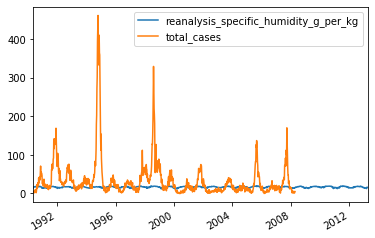

In [34]:
sj[['reanalysis_specific_humidity_g_per_kg', 'total_cases']].plot()

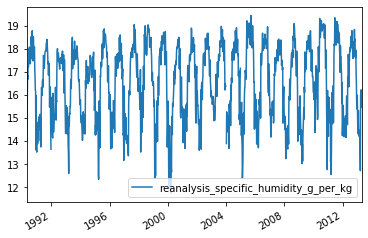

In [35]:
sj[['reanalysis_specific_humidity_g_per_kg']].plot()

In [36]:
def table_plots(data, target):
    nrow = math.ceil((data.shape[1] - 1)/2)
    #nrow = 0
    ncol = 2
    i = 0
    j = 0
    fig, axs = plt.subplots(nrow, ncol, figsize = (12,20))
    for col in data.columns:
        if col != target:
            axs[i,j].plot(data[col])
            axs[i,j].plot(data[target])
            axs[i,j].set_title('Cases and %s' % (col))
            
            if j == 0:
                j += 1
            else:
                j = 0
                i += 1
    plt.tight_layout()
    return

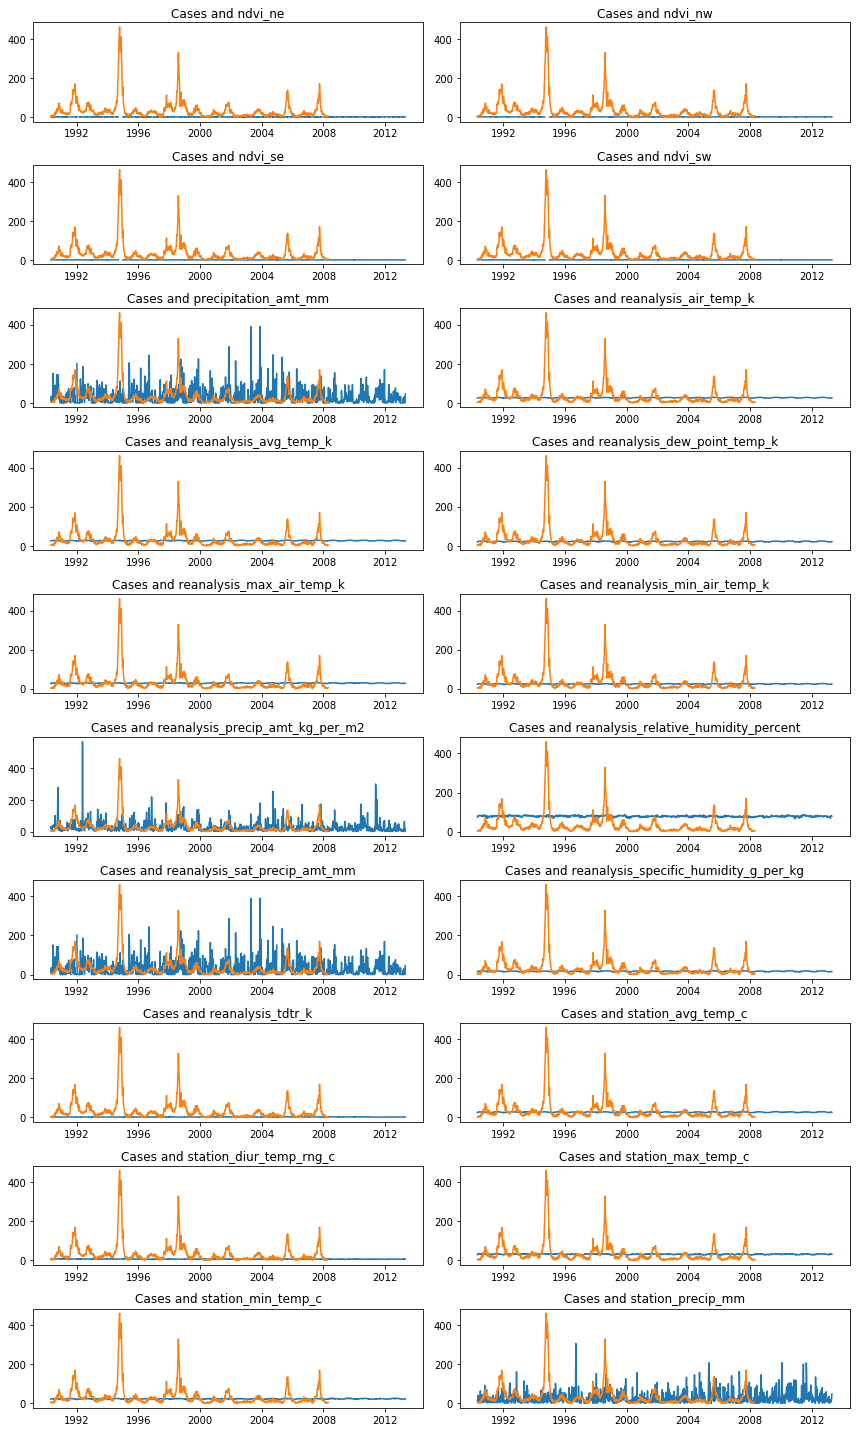

In [37]:
table_plots(sj, 'total_cases')

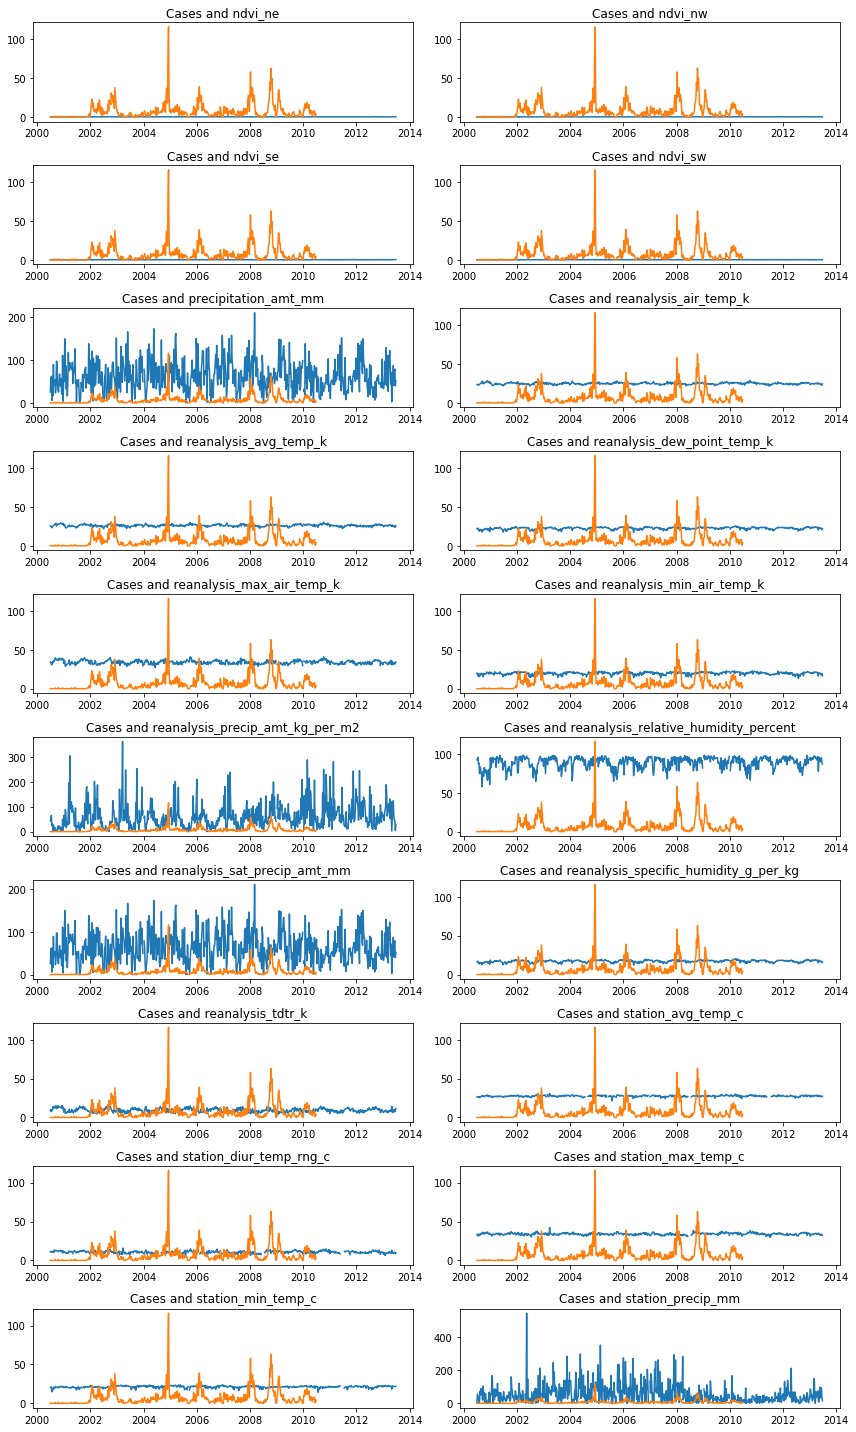

In [38]:
table_plots(iq, 'total_cases')

In [39]:
iq.tail()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,24.774286,25.964286,22.638571,32.5,19.7,...,89.990000,41.12,17.185714,10.100000,27.40,9.050,32.6,21.8,33.0,NaN
2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,24.167143,25.328571,22.845714,33.3,18.6,...,93.891429,71.52,17.448571,9.657143,27.52,10.720,33.8,21.4,68.0,NaN
2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,22.831429,23.607143,21.894286,31.6,17.7,...,94.967143,78.96,16.410000,7.385714,27.20,10.075,32.6,21.6,93.2,NaN
2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,22.778571,24.400000,20.648571,32.9,19.5,...,89.057143,39.54,15.137143,8.228571,26.70,8.480,32.2,21.8,34.1,NaN
2013-06-25,0.339467,0.240071,0.356943,0.273600,51.80,24.372857,26.000000,21.615714,34.3,16.6,...,87.030000,51.80,16.148571,11.542857,27.35,9.675,32.6,22.0,14.9,NaN


# Regression Models with top three correlated features

In [40]:
sj_selected_features = sj_corr.index[1:4]
iq_selected_features = iq_corr.index[1:4]

In [41]:
sj_selected_features

Index(['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
       'station_avg_temp_c'],
      dtype='object')

In [42]:
sj_selected = sj[sj_selected_features]
iq_selected = iq[iq_selected_features]

In [43]:
sj_selected

,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k,station_avg_temp_c
1990-04-30,14.012857,19.414286,25.442857
1990-05-07,15.372857,20.951429,26.714286
1990-05-14,16.848571,22.434286,26.714286
1990-05-21,16.672857,22.310000,27.471429
1990-05-28,17.210000,22.821429,28.942857
...,...,...,...
2013-03-26,15.985714,21.675714,27.542857
2013-04-02,15.881429,21.628571,26.642857
2013-04-09,16.212857,21.948571,27.914286
2013-04-16,15.965714,21.678571,27.728571


In [44]:
# Replace Null with Month Mean
def mean_replace(data):
    monthly = dict()
    for month in range(1,13):
        monthly[month] = data[data.index.month == month]
        for col in monthly[month]:
            monthly[month][col] = monthly[month][col].fillna(np.mean(monthly[month][col]))
    new = pd.DataFrame(columns=data.columns)
    #for num in monthly.keys():
    #    new = np.vstack([new, monthly[num]])
    templist = list()
    for a in monthly.keys():
        templist.append(monthly[a])
    result = pd.concat(templist).sort_index()
    return result

In [45]:
sj_selected = mean_replace(sj_selected)
iq_selected = mean_replace(iq_selected)

/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [46]:
sj_y = sj.total_cases.dropna()
iq_y = iq.total_cases.dropna()

In [47]:
sj_train, sj_test = sj_selected.iloc[:sj_y.shape[0]], sj_selected.iloc[sj_y.shape[0]:]
iq_train, iq_test = iq_selected.iloc[:iq_y.shape[0]], iq_selected.iloc[iq_y.shape[0]:]

In [48]:
from sklearn.svm import SVR

In [49]:
svr1 = SVR(kernel='linear')
svr_sj = svr1.fit(sj_train, sj_y)
svr2 = SVR(kernel='linear')
svr_iq = svr2.fit(iq_train, iq_y)

In [50]:
sj_result = svr_sj.predict(sj_test)
iq_result = svr_iq.predict(iq_test)

In [51]:
sub = pd.read_csv('submission_format.csv')

In [52]:
sub.total_cases = [int(i) for i in np.hstack((sj_result, iq_result))]

In [53]:
sub.to_csv('Results/SVR_feature_selection.csv', index = False)

## RANSAC

In [54]:
from sklearn.linear_model import RANSACRegressor, LinearRegression

In [55]:
ransac1 = RANSACRegressor(LinearRegression(), max_trials = 500, min_samples = 10)
ransac2 = RANSACRegressor(LinearRegression(), max_trials = 500, min_samples = 10)
ransac_sj = ransac1.fit(sj_train, sj_y)
ransac_iq = ransac2.fit(iq_train, iq_y)

In [56]:
sj_ransac_result = ransac_sj.predict(sj_test)
iq_ransac_result = ransac_iq.predict(iq_test)

In [57]:
#sub.total_cases = [int(i) for i in np.hstack((sj_result, iq_result))]
#sub.to_csv('Results/RANSAC_Feature_Selection.csv', index = False)

# Regression Models with only Temperature Features

In [58]:
sj_selected_features = [col for col in sj.columns if 'temp' in col]
iq_selected_features = [col for col in iq.columns if 'temp' in col]

In [59]:
sj_selected = sj[sj_selected_features]
iq_selected = iq[iq_selected_features]

In [60]:
sj_selected.head(3)

,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c
1990-04-30,24.572857,24.742857,19.414286,26.8,22.9,25.442857,6.900000,29.4,20.0
1990-05-07,25.211429,25.442857,20.951429,27.9,23.4,26.714286,6.371429,31.7,22.2
1990-05-14,25.781429,25.878571,22.434286,27.5,24.3,26.714286,6.485714,32.2,22.8


In [61]:
sj_selected = mean_replace(sj_selected)
iq_selected = mean_replace(iq_selected)

/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [62]:
sj_y = sj.total_cases.dropna()
iq_y = iq.total_cases.dropna()

In [63]:
sj_train, sj_test = sj_selected.iloc[:sj_y.shape[0]], sj_selected.iloc[sj_y.shape[0]:]
iq_train, iq_test = iq_selected.iloc[:iq_y.shape[0]], iq_selected.iloc[iq_y.shape[0]:]

In [64]:
svr1 = SVR(kernel='linear')
svr_sj = svr1.fit(sj_train, sj_y)
svr2 = SVR(kernel='linear')
svr_iq = svr2.fit(iq_train, iq_y)

In [65]:
sj_result = svr_sj.predict(sj_test)
iq_result = svr_iq.predict(iq_test)

In [66]:
sub.total_cases = [int(i) for i in np.hstack((sj_result, iq_result))]
#sub.to_csv('Results/SVR_temp_only.csv', index = False)

In [67]:
sj_selected.head()

,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c
1990-04-30,24.572857,24.742857,19.414286,26.8,22.9,25.442857,6.900000,29.4,20.0
1990-05-07,25.211429,25.442857,20.951429,27.9,23.4,26.714286,6.371429,31.7,22.2
1990-05-14,25.781429,25.878571,22.434286,27.5,24.3,26.714286,6.485714,32.2,22.8
1990-05-21,25.987143,26.228571,22.310000,28.4,24.0,27.471429,6.771429,33.3,23.3
1990-05-28,26.518571,26.664286,22.821429,28.9,24.5,28.942857,9.371429,35.0,23.9


## Extreme Gradient Boosting

In [68]:
import xgboost as xgb

In [69]:
xgr1 = xgb.XGBRegressor()
xgr2 = xgb.XGBRFRegressor()

In [70]:
sj_xgr = xgr1.fit(sj_train, sj_y)
iq_xgr = xgr2.fit(iq_train, iq_y)

[08:48:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [71]:
sj_result = sj_xgr.predict(sj_test)
iq_result = iq_xgr.predict(iq_test)

sub.total_cases = [int(i) for i in np.hstack((sj_result, iq_result))]
#sub.to_csv('Results/XGB_temp_only.csv', index = False)

# Stacking Algorithm

In [72]:
sj_train_size = int(sj_train.shape[0] * 0.7)
iq_train_size = int(iq_train.shape[0] * 0.7)

sj_t1, sj_t2 = sj_train.iloc[:sj_train_size], sj_train.iloc[sj_train_size:]
iq_t1, iq_t2 = iq_train.iloc[:iq_train_size], iq_train.iloc[iq_train_size:]
sj_y1, sj_y2 = sj_y.iloc[:sj_train_size], sj_y.iloc[sj_train_size:]
iq_y1, iq_y2 = iq_y.iloc[:iq_train_size], iq_y.iloc[iq_train_size:]

In [73]:
# Algorithms used for modeling
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
print('Algorithm packages imported!')

# Model selection packages used for sampling dataset and optimising parameters
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
print('Model selection packages imported!')

Algorithm packages imported!
Model selection packages imported!


## San Juan

In [74]:
#Machine Learning Algorithm (MLA) Selection and Initialization
models = [SVR(kernel='linear'), KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]

# First I will use ShuffleSplit as a way of randomising the cross validation samples.
shuff = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

#create table to compare MLA metrics
columns = ['Name', 'Parameters', 'Train Accuracy Mean', 'Test Accuracy']
before_model_compare = pd.DataFrame(columns = columns)

#index through models and save performance to table
row_index = 0
for alg in models:

    #set name and parameters
    model_name = alg.__class__.__name__
    before_model_compare.loc[row_index, 'Name'] = model_name
    before_model_compare.loc[row_index, 'Parameters'] = str(alg.get_params())
    
    alg.fit(sj_t1, sj_y1)
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    training_results = np.sqrt((-cross_val_score(alg, sj_t1, sj_y1, cv = shuff, scoring= 'neg_mean_absolute_error')).mean())
    #test_results = np.sqrt(((sj_y2-alg.predict(sj_t2))**2).mean())
    test_results = np.mean(np.abs((sj_y2 - alg.predict(sj_t2))))
    
    before_model_compare.loc[row_index, 'Train Accuracy Mean'] = (training_results)*100
    before_model_compare.loc[row_index, 'Test Accuracy'] = (test_results)*100
    
    row_index+=1
    print(row_index, alg.__class__.__name__, 'trained...')

decimals = 3
before_model_compare['Train Accuracy Mean'] = before_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
before_model_compare['Test Accuracy'] = before_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
before_model_compare

1 SVR trained...
2 KernelRidge trained...
3 ElasticNet trained...
4 Lasso trained...
5 GradientBoostingRegressor trained...
6 BayesianRidge trained...
7 LassoLarsIC trained...


/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


8 RandomForestRegressor trained...
[08:48:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
9 XGBRegressor trained...


/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


,Name,Parameters,Train Accuracy Mean,Test Accuracy
0,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",516.907,1951.936
1,KernelRidge,"{'alpha': 1, 'coef0': 1, 'degree': 3, 'gamma':...",561.401,2639.899
2,ElasticNet,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",554.881,2718.457
3,Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",555.334,2749.385
4,GradientBoostingRegressor,"{'alpha': 0.9, 'criterion': 'friedman_mse', 'i...",564.527,3365.531
5,BayesianRidge,"{'alpha_1': 1e-06, 'alpha_2': 1e-06, 'compute_...",554.826,2721.955
6,LassoLarsIC,"{'copy_X': True, 'criterion': 'aic', 'eps': 2....",560.455,2811.736
7,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",592.711,3506.626
8,XGBRegressor,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",559.911,3096.864


## Iquitos

In [75]:
#Machine Learning Algorithm (MLA) Selection and Initialization
models = [SVR(kernel='linear'), KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]

# First I will use ShuffleSplit as a way of randomising the cross validation samples.
shuff = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

#create table to compare MLA metrics
columns = ['Name', 'Parameters', 'Train Accuracy Mean', 'Test Accuracy']
before_model_compare = pd.DataFrame(columns = columns)

#index through models and save performance to table
row_index = 0
for alg in models:

    #set name and parameters
    model_name = alg.__class__.__name__
    before_model_compare.loc[row_index, 'Name'] = model_name
    before_model_compare.loc[row_index, 'Parameters'] = str(alg.get_params())
    
    alg.fit(iq_t1, iq_y1)
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    training_results = np.sqrt((-cross_val_score(alg, iq_t1, iq_y1, cv = shuff, scoring= 'neg_mean_absolute_error')).mean())
    #test_results = np.sqrt(((iq_y2-alg.predict(iq_t2))**2).mean())
    test_results = np.mean(np.abs((iq_y2 - alg.predict(iq_t2))))
    
    before_model_compare.loc[row_index, 'Train Accuracy Mean'] = (training_results)*100
    before_model_compare.loc[row_index, 'Test Accuracy'] = (test_results)*100
    
    row_index+=1
    print(row_index, alg.__class__.__name__, 'trained...')

decimals = 3
before_model_compare['Train Accuracy Mean'] = before_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
before_model_compare['Test Accuracy'] = before_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
before_model_compare

1 SVR trained...
2 KernelRidge trained...
3 ElasticNet trained...
4 Lasso trained...
5 GradientBoostingRegressor trained...
6 BayesianRidge trained...
7 LassoLarsIC trained...
8 RandomForestRegressor trained...
[08:48:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[08:48:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
9 XGBRegressor trained...


/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


,Name,Parameters,Train Accuracy Mean,Test Accuracy
0,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",254.628,755.725
1,KernelRidge,"{'alpha': 1, 'coef0': 1, 'degree': 3, 'gamma':...",259.450,744.124
2,ElasticNet,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",256.678,732.208
3,Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",256.784,734.805
4,GradientBoostingRegressor,"{'alpha': 0.9, 'criterion': 'friedman_mse', 'i...",266.233,823.028
5,BayesianRidge,"{'alpha_1': 1e-06, 'alpha_2': 1e-06, 'compute_...",257.130,725.894
6,LassoLarsIC,"{'copy_X': True, 'criterion': 'aic', 'eps': 2....",256.972,738.694
7,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",269.697,854.712
8,XGBRegressor,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",264.739,801.906


## GridSearch

### San Juan

In [106]:
'''
models = [SVR(kernel='linear'), KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]

SVR_param_grid = {'gamma': ['scale', 'auto'], 'shrinking': [True, False]}
KR_param_grid = {'alpha': [0.1], 'coef0': [100], 'degree': [1], 'gamma': [None], 'kernel': ['polynomial']}
EN_param_grid = {'alpha': [0.001], 'copy_X': [True], 'l1_ratio': [0.6], 'fit_intercept': [True], 'normalize': [False], 
                         'precompute': [False], 'max_iter': [300], 'tol': [0.001], 'selection': ['random'], 'random_state': [None]}
LASS_param_grid = {'alpha': [0.0005], 'copy_X': [True], 'fit_intercept': [True], 'normalize': [False], 'precompute': [False], 
                    'max_iter': [300], 'tol': [0.01], 'selection': ['random'], 'random_state': [None]}
GB_param_grid = {'loss': ['huber'], 'learning_rate': [0.1], 'n_estimators': [300], 'max_depth': [3], 
                                        'min_samples_split': [0.0025], 'min_samples_leaf': [5]}
BR_param_grid = {'n_iter': [200], 'tol': [0.00001], 'alpha_1': [0.00000001], 'alpha_2': [0.000005], 'lambda_1': [0.000005], 
                 'lambda_2': [0.00000001], 'copy_X': [True]}
LL_param_grid = {'criterion': ['aic'], 'normalize': [True], 'max_iter': [100], 'copy_X': [True], 'precompute': ['auto'], 'eps': [0.000001]}
RFR_param_grid = {'n_estimators': [50], 'max_features': ['auto'], 'max_depth': [None], 'min_samples_split': [5], 'min_samples_leaf': [2]}
XGB_param_grid = {'max_depth': [3], 'learning_rate': [0.1], 'n_estimators': [300], 'booster': ['gbtree'], 'gamma': [0], 'reg_alpha': [0.1],
                  'reg_lambda': [0.7], 'max_delta_step': [0], 'min_child_weight': [1], 'colsample_bytree': [0.5], 'colsample_bylevel': [0.2],
                  'scale_pos_weight': [1]}
params_grid = [SVR_param_grid, KR_param_grid, EN_param_grid, LASS_param_grid, GB_param_grid, BR_param_grid, LL_param_grid, RFR_param_grid, XGB_param_grid]

after_model_compare = pd.DataFrame(columns = columns)

row_index = 0

for alg in models:
    
    gs_alg = GridSearchCV(alg, param_grid = params_grid[0], cv = shuff, scoring = 'neg_mean_absolute_error', n_jobs=-1)
    params_grid.pop(0)

    #set name and parameters
    model_name = alg.__class__.__name__
    after_model_compare.loc[row_index, 'Name'] = model_name
    
    gs_alg.fit(sj_t1, sj_y1)
    gs_best = gs_alg.best_estimator_
    after_model_compare.loc[row_index, 'Parameters'] = str(gs_alg.best_params_)
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    after_training_results = np.sqrt(-gs_alg.best_score_)
    #test_results = np.sqrt(((sj_y2-alg.predict(sj_t2))**2).mean())
    test_results = np.mean(np.abs((sj_y2 - alg.predict(sj_t2))))
    
    after_model_compare.loc[row_index, 'Train Accuracy Mean'] = (after_training_results)*100
    after_model_compare.loc[row_index, 'Test Accuracy'] = (after_test_results)*100
    
    row_index+=1
    print(row_index, alg.__class__.__name__, 'trained...')

decimals = 3
after_model_compare['Train Accuracy Mean'] = after_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
after_model_compare['Test Accuracy'] = after_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
after_model_compare
'''

"\nmodels = [SVR(kernel='linear'), KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]\n\nSVR_param_grid = {'gamma': ['scale', 'auto'], 'shrinking': [True, False]}\nKR_param_grid = {'alpha': [0.1], 'coef0': [100], 'degree': [1], 'gamma': [None], 'kernel': ['polynomial']}\nEN_param_grid = {'alpha': [0.001], 'copy_X': [True], 'l1_ratio': [0.6], 'fit_intercept': [True], 'normalize': [False], \n                         'precompute': [False], 'max_iter': [300], 'tol': [0.001], 'selection': ['random'], 'random_state': [None]}\nLASS_param_grid = {'alpha': [0.0005], 'copy_X': [True], 'fit_intercept': [True], 'normalize': [False], 'precompute': [False], \n                    'max_iter': [300], 'tol': [0.01], 'selection': ['random'], 'random_state': [None]}\nGB_param_grid = {'loss': ['huber'], 'learning_rate': [0.1], 'n_estimators': [300], 'max_depth': [3], \n                                        'min_s

### Iquitos

In [ ]:
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]

KR_param_grid = {'alpha': [0.1], 'coef0': [100], 'degree': [1], 'gamma': [None], 'kernel': ['polynomial']}
EN_param_grid = {'alpha': [0.001], 'copy_X': [True], 'l1_ratio': [0.6], 'fit_intercept': [True], 'normalize': [False], 
                         'precompute': [False], 'max_iter': [300], 'tol': [0.001], 'selection': ['random'], 'random_state': [None]}
LASS_param_grid = {'alpha': [0.0005], 'copy_X': [True], 'fit_intercept': [True], 'normalize': [False], 'precompute': [False], 
                    'max_iter': [300], 'tol': [0.01], 'selection': ['random'], 'random_state': [None]}
GB_param_grid = {'loss': ['huber'], 'learning_rate': [0.1], 'n_estimators': [300], 'max_depth': [3], 
                                        'min_samples_split': [0.0025], 'min_samples_leaf': [5]}
BR_param_grid = {'n_iter': [200], 'tol': [0.00001], 'alpha_1': [0.00000001], 'alpha_2': [0.000005], 'lambda_1': [0.000005], 
                 'lambda_2': [0.00000001], 'copy_X': [True]}
LL_param_grid = {'criterion': ['aic'], 'normalize': [True], 'max_iter': [100], 'copy_X': [True], 'precompute': ['auto'], 'eps': [0.000001]}
RFR_param_grid = {'n_estimators': [50], 'max_features': ['auto'], 'max_depth': [None], 'min_samples_split': [5], 'min_samples_leaf': [2]}
XGB_param_grid = {'max_depth': [3], 'learning_rate': [0.1], 'n_estimators': [300], 'booster': ['gbtree'], 'gamma': [0], 'reg_alpha': [0.1],
                  'reg_lambda': [0.7], 'max_delta_step': [0], 'min_child_weight': [1], 'colsample_bytree': [0.5], 'colsample_bylevel': [0.2],
                  'scale_pos_weight': [1]}
params_grid = [KR_param_grid, EN_param_grid, LASS_param_grid, GB_param_grid, BR_param_grid, LL_param_grid, RFR_param_grid, XGB_param_grid]

after_model_compare = pd.DataFrame(columns = columns)

row_index = 0

for alg in models:
    
    gs_alg = GridSearchCV(alg, param_grid = params_grid[0], cv = shuff, scoring = 'neg_mean_absolute_error', n_jobs=-1)
    params_grid.pop(0)

    #set name and parameters
    model_name = alg.__class__.__name__
    after_model_compare.loc[row_index, 'Name'] = model_name
    
    gs_alg.fit(iq_t1, iq_y1)
    gs_best = gs_alg.best_estimator_
    after_model_compare.loc[row_index, 'Parameters'] = str(gs_alg.best_params_)
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    after_training_results = np.sqrt(-gs_alg.best_score_)
    after_test_results = np.sqrt(((iq_y2-gs_alg.predict(iq_t2))**2).mean())
    
    after_model_compare.loc[row_index, 'Train Accuracy Mean'] = (after_training_results)*100
    after_model_compare.loc[row_index, 'Test Accuracy'] = (after_test_results)*100
    
    row_index+=1
    print(row_index, alg.__class__.__name__, 'trained...')

decimals = 3
after_model_compare['Train Accuracy Mean'] = after_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
after_model_compare['Test Accuracy'] = after_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
after_model_compare

# Log-Scale Plot

In [93]:
sj_log = sj.copy()
iq_log = iq.copy()

sj_log['total_cases'] = np.log1p(sj_log['total_cases'])
iq_log['total_cases'] = np.log1p(iq_log['total_cases'])

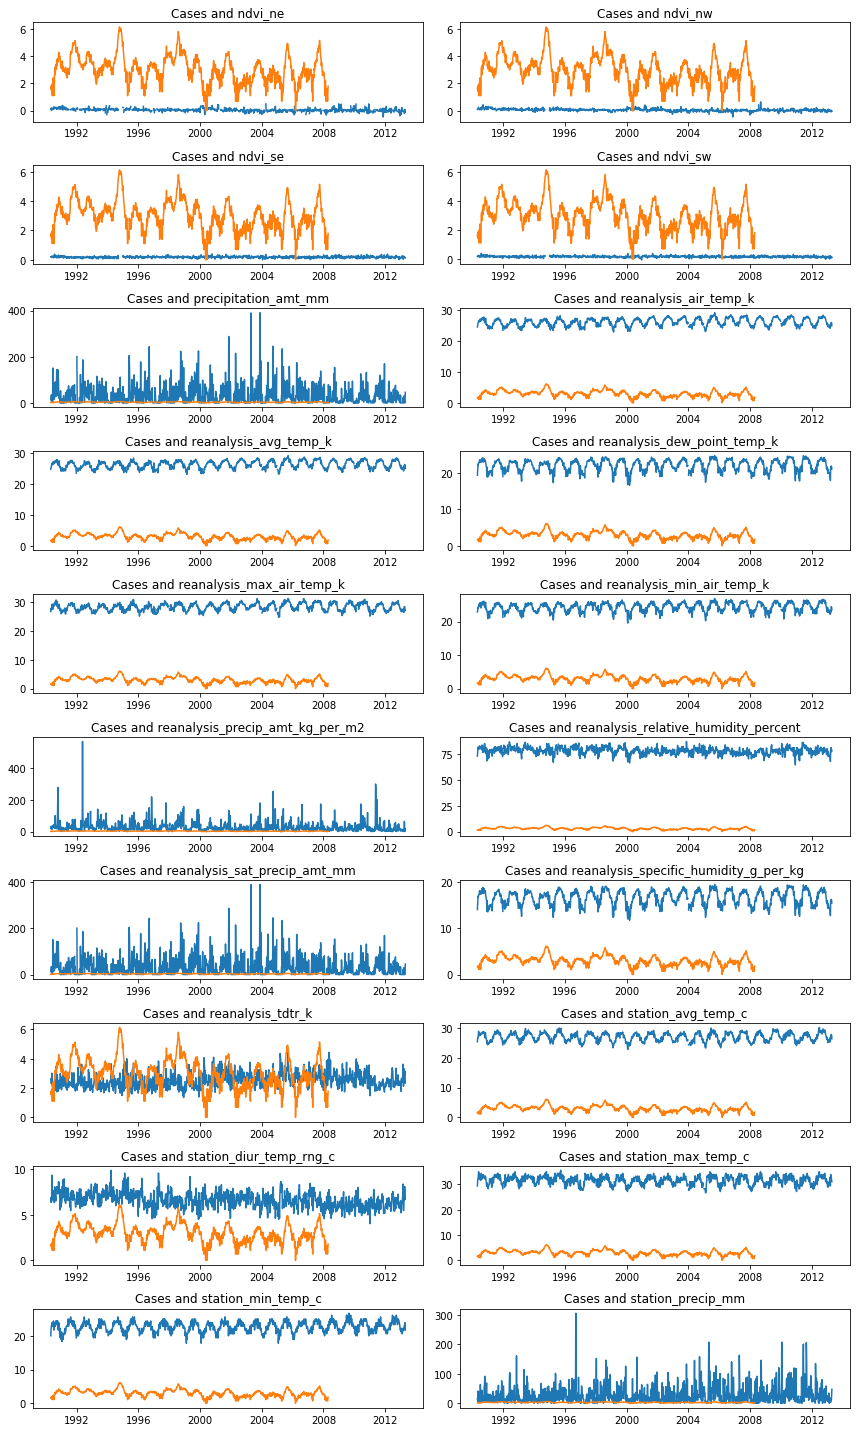

In [94]:
table_plots(sj_log, 'total_cases')

/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


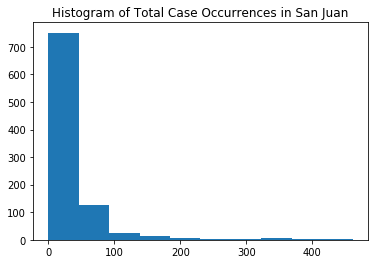

In [95]:
plt.hist(sj['total_cases'])
plt.title('Histogram of Total Case Occurrences in San Juan')
plt.show()

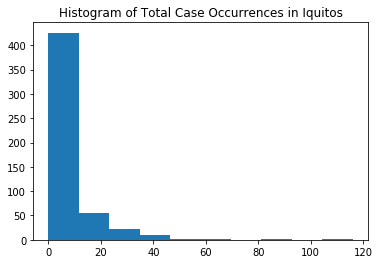

In [96]:
plt.hist(iq['total_cases'])
plt.title('Histogram of Total Case Occurrences in Iquitos')
plt.show()

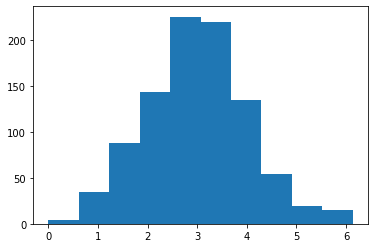

In [97]:
plt.hist(sj_log['total_cases'])
plt.show()

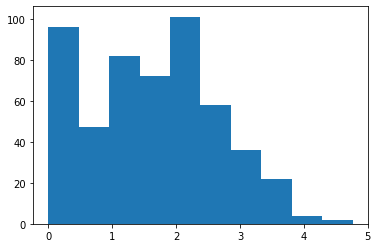

In [98]:
plt.hist(iq_log['total_cases'])
plt.show()

# Iquitos - Ratio Population Distribution

In [99]:
iq_pop = pd.read_csv('iq_pop.csv')

In [100]:
iq_pop.Year

0     2000
1     2001
2     2002
3     2003
4     2004
5     2005
6     2006
7     2007
8     2008
9     2009
10    2010
11    2011
12    2012
13    2013
14    2014
Name: Year, dtype: int64

In [101]:
iq_cases = iq.total_cases
iq_cases.head()

2000-07-01    0.0
2000-07-08    0.0
2000-07-15    0.0
2000-07-22    0.0
2000-07-29    0.0
Name: total_cases, dtype: float64

In [102]:
iq_cases_ratio = iq_cases.copy()
for i in range(iq_cases.shape[0]):
    year_position = np.argwhere(iq_pop.Year == iq_cases.index[i].year)
    iq_cases_ratio.iloc[i] = 10e3 * iq_cases.iloc[i] / iq_pop.Year.iloc[year_position[0][0]]

/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


(array([ 96.,   0.,  47.,  46.,  64., 124.,  82.,  44.,  14.,   3.]),
 array([0.        , 0.63627562, 1.27255124, 1.90882686, 2.54510248,
        3.1813781 , 3.81765372, 4.45392934, 5.09020496, 5.72648058,
        6.3627562 ]),
 <a list of 10 Patch objects>)

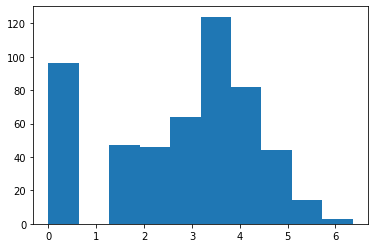

In [103]:
plt.hist(np.log1p(iq_cases_ratio.dropna()))

In [104]:
iq_cases_ratio[20:40]

2000-11-18    0.0
2000-11-25    0.0
2000-12-02    0.0
2000-12-09    0.0
2000-12-16    5.0
2000-12-23    0.0
2001-01-01    0.0
2001-01-08    0.0
2001-01-15    0.0
2001-01-22    0.0
2001-01-29    0.0
2001-02-05    0.0
2001-02-12    0.0
2001-02-19    0.0
2001-02-26    0.0
2001-03-05    0.0
2001-03-12    0.0
2001-03-19    0.0
2001-03-26    0.0
2001-04-02    0.0
Name: total_cases, dtype: float64

# What is the best lag?

In [77]:
def best_lag(x, max_lag):
    x_ = x.copy()
    y_ = x_.pop('total_cases')
    corrlist = list()
    for i in range(max_lag):
        x_temp = x_.iloc[:-i - 1]
        y_temp = y_.iloc[i:]
        x_temp['total_cases'] = y_temp
        corrlist.append(x_temp.corr()['total_cases'])
    return corrlist

In [78]:
sj_corrtest = best_lag(sj, 30)

for corr in sj_corrtest:
    print(np.mean(corr))

0.15330233075336683
0.15303837516052682
0.15293057594295179
0.15298365785750084
0.15321365825939764
0.15376038182778928
0.1541039805434074
0.1542559014757483
0.15460994504264566
0.15477856019413805
0.15506389767990544
0.15526085082692384
0.15591116614498907
0.15613887691188677
0.1565597635496791
0.15668727457397327
0.15706153650174803
0.1572552060847718
0.15741994120359726
0.1576416046675667
0.15806228808091569
0.15795591333616463
0.158103478438038
0.1580082265871206
0.15810830839101897
0.1581449988833167
0.1581799568060719
0.15768210951085543
0.15726834851836383
0.157145372189879


/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
iq_corrtest = best_lag(iq, 30)

for corr in iq_corrtest:
    print(np.mean(corr))

0.11744840182231504
0.11692055397602578
0.1167919713891058
0.1162020090947339
0.11479979479659672
0.11445650941176687
0.11329779977497065
0.11351826142881206
0.11349212932085774
0.11365465010345088
0.11391435435995759
0.11434697289209608
0.1146563256042055
0.11490864331927139
0.11475611515516446
0.11481065117857854
0.11458825387636373
0.1148625937537799
0.11547337734684157
0.11597586470694965
0.11656683763560913
0.11684569593977119
0.11726181146767896
0.11740520214631814
0.11735486686940245
0.11775785064543577
0.11782776892097747
0.11796638398966763
0.11788961198960475
0.11802828734752521


/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
sj_t3 = sj_corr.index[1:4]
iq_t3 = iq_corr.index[1:4]

sj_top3 = sj[sj_t3]
sj_top3['total_cases'] = sj['total_cases']
iq_top3 = iq[iq_t3]
iq_top3['total_cases'] = iq.total_cases

sj_ts = [col for col in sj.columns if 'temp' in col]
iq_ts = [col for col in iq.columns if 'temp' in col]

sj_temps = sj[sj_ts]
iq_temps = iq[iq_ts]
sj_temps['total_cases'] = sj.total_cases
iq_temps['total_cases'] = iq.total_cases

/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [92]:
sj_top3_corr = best_lag(sj_top3, 30)
i_ = 0
for c in sj_top3_corr:
    print(i_, np.mean(c) * 100)
    i_ += 1

0 40.208455247290736
1 40.15983661098755
2 40.139628452982535
3 40.145668995510874
4 40.157634202980994
5 40.199249025010594
6 40.23359173966197
7 40.25701364215214
8 40.30969539054853
9 40.350026887372145
10 40.40356323913471
11 40.42955996099149
12 40.47801007689591
13 40.511509284294334
14 40.53783649955833
15 40.56114115294008
16 40.60986700100907
17 40.6410042556852
18 40.66671699656934
19 40.684661345312826
20 40.73124842412612
21 40.73047060389421
22 40.74404157181451
23 40.74194837524749
24 40.75763914344701
25 40.75335846411783
26 40.75513830638805
27 40.73259939261742
28 40.687634359994874
29 40.683427848745005


/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
iq_top3_corr = best_lag(iq_top3, 30)
for c in iq_top3_corr:
    print(np.mean(c))

0.4203478542214588
0.4203072203308451
0.4199975594270444
0.42006298213611726
0.41870429590091407
0.4179000050132494
0.4163706165496314
0.4156091172902461
0.41466013656371303
0.4135249048814067
0.41281544396732034
0.4118205139654316
0.41101695262454535
0.40950279405083867
0.408211727130724
0.40781020446912675
0.4072948481932942
0.4066671321720249
0.4061176175237737
0.4059432036827722
0.40621694295435273
0.406025594201207
0.4053086590219328
0.40510310109012504
0.40407226080868164
0.40351976301702885
0.4027404545009746
0.4037872790301873
0.4031754145198603
0.4032448989067078


/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [90]:
sj_temps_corr = best_lag(sj_temps, 30)
for c in sj_temps_corr:
    print(np.mean(c))

0.25415926438924635
0.253672098959328
0.2534678771589561
0.25342929516114376
0.25357137097969956
0.25421756533020434
0.25472442991037514
0.2548768651318233
0.25527993426065365
0.25561876796875477
0.2561813583293246
0.2563488208642689
0.25672869537887516
0.2568788694107365
0.25726552077976667
0.25754322577704036
0.2578781334285347
0.2581546860862087
0.2583299792427041
0.2586159309157675
0.25912333778125163
0.25909566704711723
0.25932992110819164
0.2592903978978229
0.25938542394946396
0.25934415849917397
0.25935767572673907
0.2590975863388176
0.258533153544901
0.2584480444664262


/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [105]:
iq_temps_corr = best_lag(iq_temps, 30)
for c in iq_temps_corr:
    print(np.mean(c))

0.19072322354278484
0.19020437750944325
0.1898335427328865
0.1891929798031927
0.18733051707111098
0.18649506663436846
0.18508561401675333
0.1848221085805216
0.1842326218605248
0.18418635334407524
0.18459935185754184
0.18589934013870202
0.18666164639378108
0.18670621202219287
0.18701213074911127
0.18717429944365868
0.18742071593230758
0.18830670999862023
0.1890752093181601
0.19015469960526682
0.19178748776035398
0.19417448208844162
0.1956862700946233
0.19639885646540406
0.19749412668142638
0.1975920246612694
0.19905816600793194
0.19924284867603184
0.1992137679386891
0.19939905927660603


/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [108]:
sj.corr()['total_cases'].sort_values(ascending = False)

total_cases                              1.000000
reanalysis_specific_humidity_g_per_kg    0.207947
reanalysis_dew_point_temp_k              0.203774
station_avg_temp_c                       0.196617
reanalysis_max_air_temp_k                0.194532
station_max_temp_c                       0.189901
reanalysis_min_air_temp_k                0.187943
reanalysis_air_temp_k                    0.181917
station_min_temp_c                       0.177012
reanalysis_avg_temp_k                    0.175267
reanalysis_relative_humidity_percent     0.144045
reanalysis_precip_amt_kg_per_m2          0.107457
ndvi_nw                                  0.075307
reanalysis_sat_precip_amt_mm             0.060211
precipitation_amt_mm                     0.060211
station_precip_mm                        0.051759
ndvi_ne                                  0.037639
station_diur_temp_rng_c                  0.034630
ndvi_se                                  0.001113
ndvi_sw                                 -0.000333
